# FerroSim
By R. Vasudevan

This is a simulator based on a kinetic lattice model of a ferroelectric with a double well potential and a vector order parameter $(P_x,P_y)$ at each site. The original inspiration for this model was by Ricinschii et al. J. Phys.: Condens. Matter 10 (1998) 477–492. The functionals have been changed a bit as we have a 2D model. The functionals depend on the mode the simulation is run in:


**Modes:**

**'uniaxial':**

$F=\sum_{n}^{N}{\left(\frac{\alpha_1}{2}\right)p_{i,j}^2+\left(\frac{\alpha_2}{4}\right)p_{i,j}^4+K\sum_{k,l}{(p_{i,j}-p_{i+k,j+l})}^2\ -E_{loc}p_n}$

**'squareelectric':**
$F_{square}=\ \sum_{i,j}^{N}\left[\left(\frac{\alpha_1}{2}\right)p_{x_{ij}}^2+\left(\frac{\alpha_2}{4}\right)p_{x_{ij}}^4+K\sum_{k,l}\left(p_{x_{ij}}-p_{x_{i+k,\ j+l}}\right)^2+\ \left(\frac{\alpha_1}{2}\right)p_{y_{ij}}^2+\left(\frac{\alpha_2}{4}\right)p_{y_{ij}}^4+K\sum_{k,l}\left(p_{y_{ij}}-p_{y_{i+k,\ j+l\ }}\right)^2-E_{loc_y}p_{y_{ij}\ \ }\right]$

**'tetragonal' or 'rhombohedral':**

$F=\sum_{i,j}^{N}{\alpha_1\left(p_{x_{ij}}^2+p_{y_{ij}}^2\right)+\alpha_2\left(p_{x_{ij}}^4+p_{y_{ij}}^4\right)+\alpha_3p_{x_{ij}}^2p_{y_{ij}}^2+K\sum_{k,l}{(p_{ij}-p_{i+k,j+l})}^2\ -E_{loc_x}p_{x_{ij}}-{E_{loc}}_yp_{y_{ij}}}$

where in all cases

$E_{loc}=E_{ext}+E_{dep}+E_d\left(i,j\right)$

and the $E_{dep} = -\alpha_{dep}<P>$ where $<P> = 1/N \sum_{i=1}^{N}{p_n}$

Finally we calculate the evolution of the polarization (order parameter) by calculating the derivative with respect to polarization each component (e.g, for $p_x$):

$\frac {dp_{ij,x}}{dt} = - \gamma \frac{\partial F}{\partial p_{ij,x}}$

where $\gamma$ can be thought of as the domain wall mobility or momentum. You can adjust gamma, but setting large values can make the calculation unstable. The derivative is calculated analytically at each site, for example for the uniaxial case it is

$\frac{dp_{ij}}{dt}=\ -\gamma^{}\left(\alpha_1 p_{ij}+\alpha_2  p_{ij}^3 + K\sum_{k,l}{{(p}_{ij}-\ p_{kl})}-E_{loc}\right)$

and the components of polarization at the site are updated in the direction of the gradient:

$p_{ij,x}(t_{n+1}) = p_{ij,x}(t_n) + \Delta \frac {dp_{ij,x}}{dt}$

and similarly for $p_{ij,y}$

The default values for the Landau coefficients are given below:

**Mode** **$\alpha_1$ $\alpha_2$ $\alpha_3$**

*Uniaxial:* -1.85,	1.25, N/A

*Squareelectric:* -1.85,	1.25, N/A

*Tetragonal:* -1.6	12.2	40.0

*Rhombohedral:* -10.6	10.2	-10.0

**NOTE: The coefficients for the rhomohedral case don't appear to be very good. Need to adjust them.**

It offers the ability to add defects that affect the local potential through both random bond and random field effects, as well as apply arbitrary waveforms to measure the polarization dynamics. Finally it offers the ability to visualize the results.

Let's explore...

Note: Google Colab does not support interactive visualization with matplotlib. To get the full experience, download this notebook and run locally (sorry - This is a Google Colab issue and not likely to be changed, due to security concerns). However, you can save animations as movie clips and watch them.

In [ ]:
 #Install the package
!pip install -e git+https://github.com/ramav87/FerroSim.git@rama-dev#egg=FerroSim
#Note: Once you install, restart the runtime, but do not re-run this cell.

Obtaining FerroSim from git+https://github.com/ramav87/FerroSim.git@rama-dev#egg=FerroSim
  Cloning https://github.com/ramav87/FerroSim.git (to revision rama-dev) to ./src/ferrosim
  Running command git clone --filter=blob:none --quiet https://github.com/ramav87/FerroSim.git /content/src/ferrosim
  Running command git checkout -b rama-dev --track origin/rama-dev
  Switched to a new branch 'rama-dev'
  Branch 'rama-dev' set up to track remote branch 'rama-dev' from 'origin'.
  Resolved https://github.com/ramav87/FerroSim.git to commit 83b79be078001e93d4d10fcab403ba2f8d688a27
  Preparing metadata (setup.py) ... done
  Running setup.py develop for FerroSim


In [ ]:
#Let's import some necessary packages
import numpy as np
import matplotlib.pyplot as plt
#The most important one...
from ferrosim import Ferro2DSim

/content/src/ferrosim/ferrosim/simclass.py:590: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)


# Run a default version of the simulator (Uniaxial)

You can just run the simulator with default settings. This will produce a simple bi-stable ferroelectric with uniform polarization switching.

---Performing simulation---


100%|██████████| 498/498 [00:12<00:00, 39.70it/s]


---Performing simulation---


100%|██████████| 498/498 [00:09<00:00, 50.61it/s] 


---Performing simulation---


100%|██████████| 498/498 [00:05<00:00, 85.78it/s] 


---Performing simulation---


100%|██████████| 498/498 [00:06<00:00, 75.70it/s]


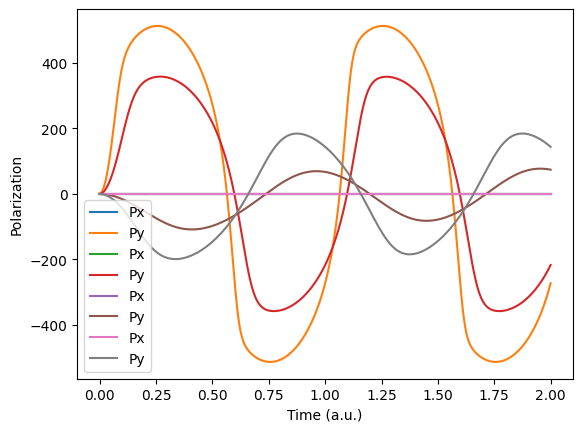

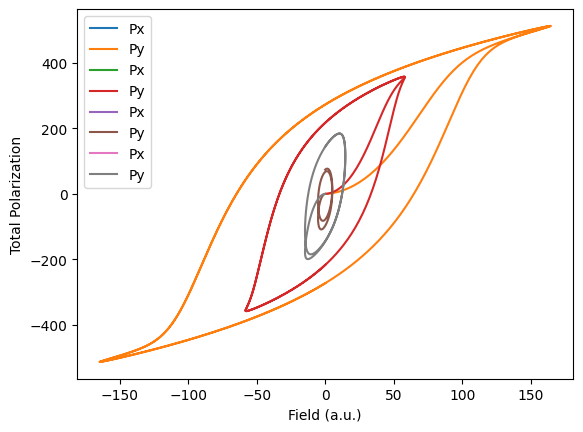

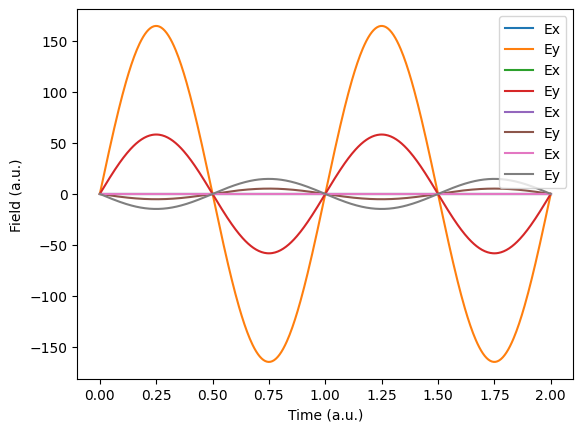

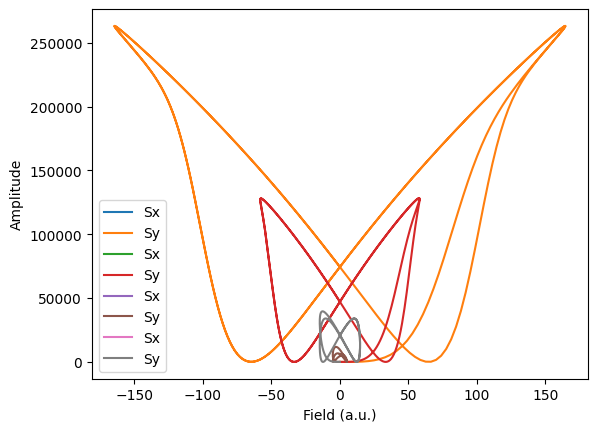

In [ ]:
Pmats = []
for temp in [300, 350, 410, 420]:
  time_vec = np.linspace(0,2,500)

  #Let's now make a somewhat complicated electric field
  Evec_x = 0*np.ones(len(time_vec))
  Evec_y = 190*np.sin(2*np.pi*time_vec)
  applied_field = np.vstack((Evec_x, Evec_y)).T

  landau_parms = {'alpha1': -1.85 / -100, 'alpha2':1.25 } #alpha1 is technically the temperature independent term, it gets multipeld by T diff.

  init_pmat = np.random.uniform(low = -0.2, high = 0.2, size = (10,10))*1.0E-6
  init_pmat_full = np.zeros(shape=(10,10,2))
  init_pmat_full[:,:,1] = init_pmat
  sim = Ferro2DSim(mode = 'uniaxial', k = 10.0,
                   temp = temp, time_vec = time_vec, appliedE = applied_field, initial_p = init_pmat_full, landau_parms = landau_parms)
  sim.runSim()

  sim.plot_summary()
  #sim.plot_quiver()
  Pmats.append(sim.getPmat())
  del sim


(array([-600., -400., -200.,    0.,  200.,  400.,  600.]),
 [Text(0, -600.0, '−600'),
  Text(0, -400.0, '−400'),
  Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600')])

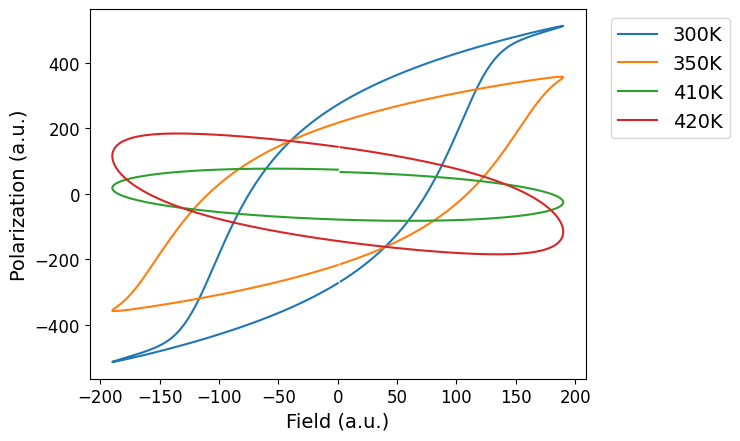

In [ ]:
plt.figure()
labels = ['300K', '350K', '410K', '420K']
for ind in range(4):
  fe_loop = Pmats[ind][1,:,:,:].sum(axis=((-1,-2)))
  plt.plot(applied_field[250:,1], fe_loop[250:], label = labels[ind])
plt.legend(loc = [1.05, 0.65], fontsize = 14)

plt.xlabel('Field (a.u.)', fontsize = 14)
plt.ylabel('Polarization (a.u.)', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

---Performing simulation---


100%|██████████| 498/498 [00:06<00:00, 82.13it/s] 


---Performing simulation---


100%|██████████| 498/498 [00:05<00:00, 88.42it/s]


---Performing simulation---


100%|██████████| 498/498 [00:04<00:00, 111.59it/s]


---Performing simulation---


100%|██████████| 498/498 [00:04<00:00, 110.82it/s]


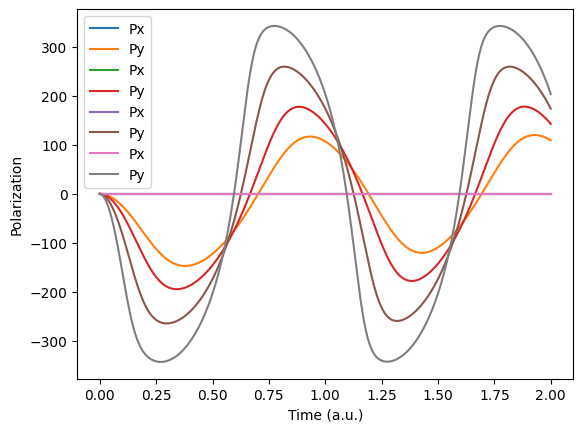

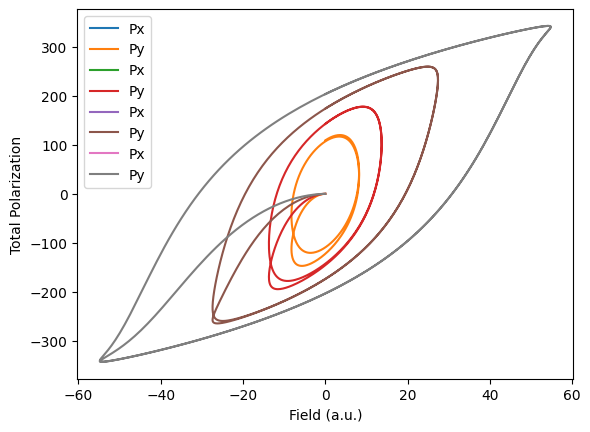

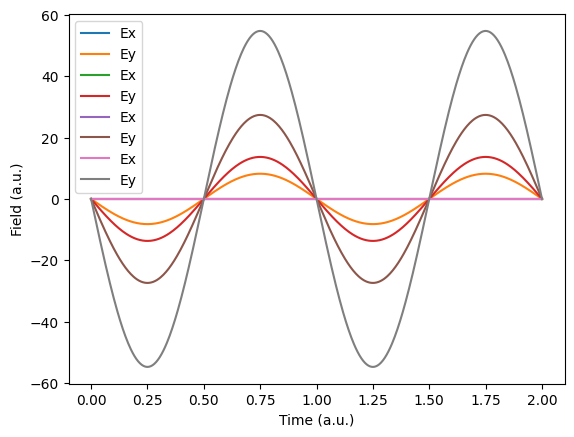

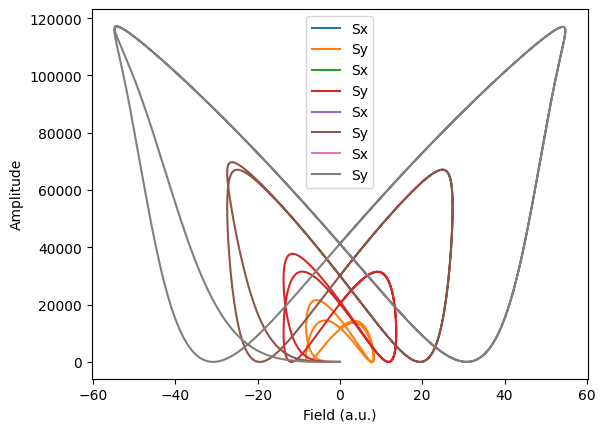

In [ ]:
#Now just a high T one
Pmats_ht = []
temp = 410 #410K
for field_coeff in [300, 500, 1000, 2000]:
  time_vec = np.linspace(0,2,500)

  #Let's now make a somewhat complicated electric field
  Evec_x = 0*np.ones(len(time_vec))
  Evec_y = field_coeff*np.sin(2*np.pi*time_vec)
  applied_field = np.vstack((Evec_x, Evec_y)).T

  landau_parms = {'alpha1': -1.85 / -100, 'alpha2':1.25 } #alpha1 is technically the temperature independent term, it gets multipeld by T diff.

  init_pmat = np.random.uniform(low = -0.2, high = 0.2, size = (10,10))*1.0E-6
  init_pmat_full = np.zeros(shape=(10,10,2))
  init_pmat_full[:,:,1] = init_pmat
  sim = Ferro2DSim(mode = 'uniaxial', k = 10.0,
                   temp = temp, time_vec = time_vec, appliedE = applied_field, initial_p = init_pmat_full, landau_parms = landau_parms)
  sim.runSim()

  sim.plot_summary()
  #sim.plot_quiver()
  Pmats_ht.append(sim.getPmat())
  del sim


(array([-400., -300., -200., -100.,    0.,  100.,  200.,  300.,  400.]),
 [Text(0, -400.0, '−400'),
  Text(0, -300.0, '−300'),
  Text(0, -200.0, '−200'),
  Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400')])

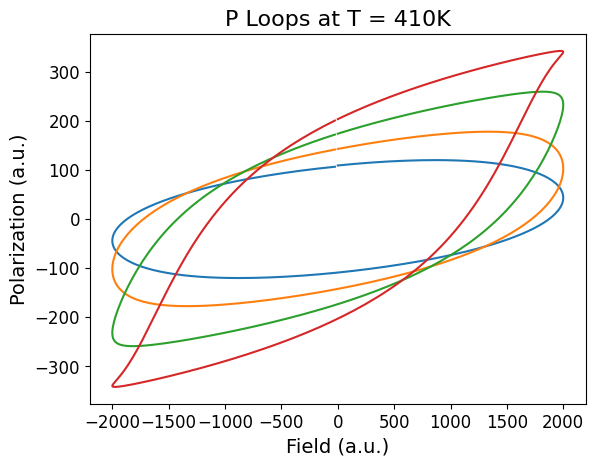

In [ ]:
plt.figure()
labels = ['1', '2', '3', '4']
for ind in range(4):
  fe_loop = Pmats_ht[ind][1,:,:,:].sum(axis=((-1,-2)))
  plt.plot(-1*applied_field[250:,1], fe_loop[250:], label = labels[ind])
#plt.legend(loc = [1.05, 0.65], fontsize = 14)

plt.xlabel('Field (a.u.)', fontsize = 14)
plt.ylabel('Polarization (a.u.)', fontsize = 14)
plt.title('P Loops at T = 410K', fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

# More complex examples: Custom electric fields

The previous case was rather boring. Let's add a custom electric field, instead of the basic sine wave. The electric field must have x and y components, and be of size (time_steps, 2). We also need to create a time vector (time_vec), which is easy enough.

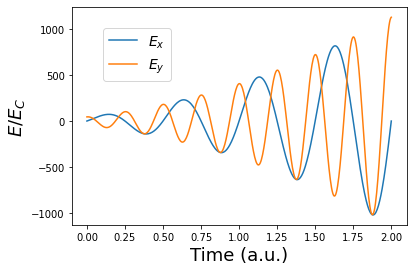

In [ ]:
#Let's go from 0 to 2
time_vec = np.linspace(0,2,500)

#Let's now make a somewhat complicated electric field
Evec_x = 180*((time_vec+0.5)**2)*np.sin(2*np.pi*2.0*time_vec)
Evec_y = 180*((time_vec+0.5)**2)*np.cos(4*np.pi*2.0*time_vec)

applied_field = np.vstack((Evec_x, Evec_y)).T

#Let's plot this to see what it looks like
fig, axes = plt.subplots()
axes.plot(time_vec, applied_field[:,0], label ='$E_x$')
axes.plot(time_vec, applied_field[:,1], label ='$E_y$')
axes.set_xlabel('Time (a.u.)', fontsize = 18)
axes.set_ylabel('$E/E_C$', fontsize = 18)
fig.legend(loc = [0.25, 0.70], fontsize = 14)



---Performing simulation---


100%|██████████| 498/498 [00:28<00:00, 17.40it/s]


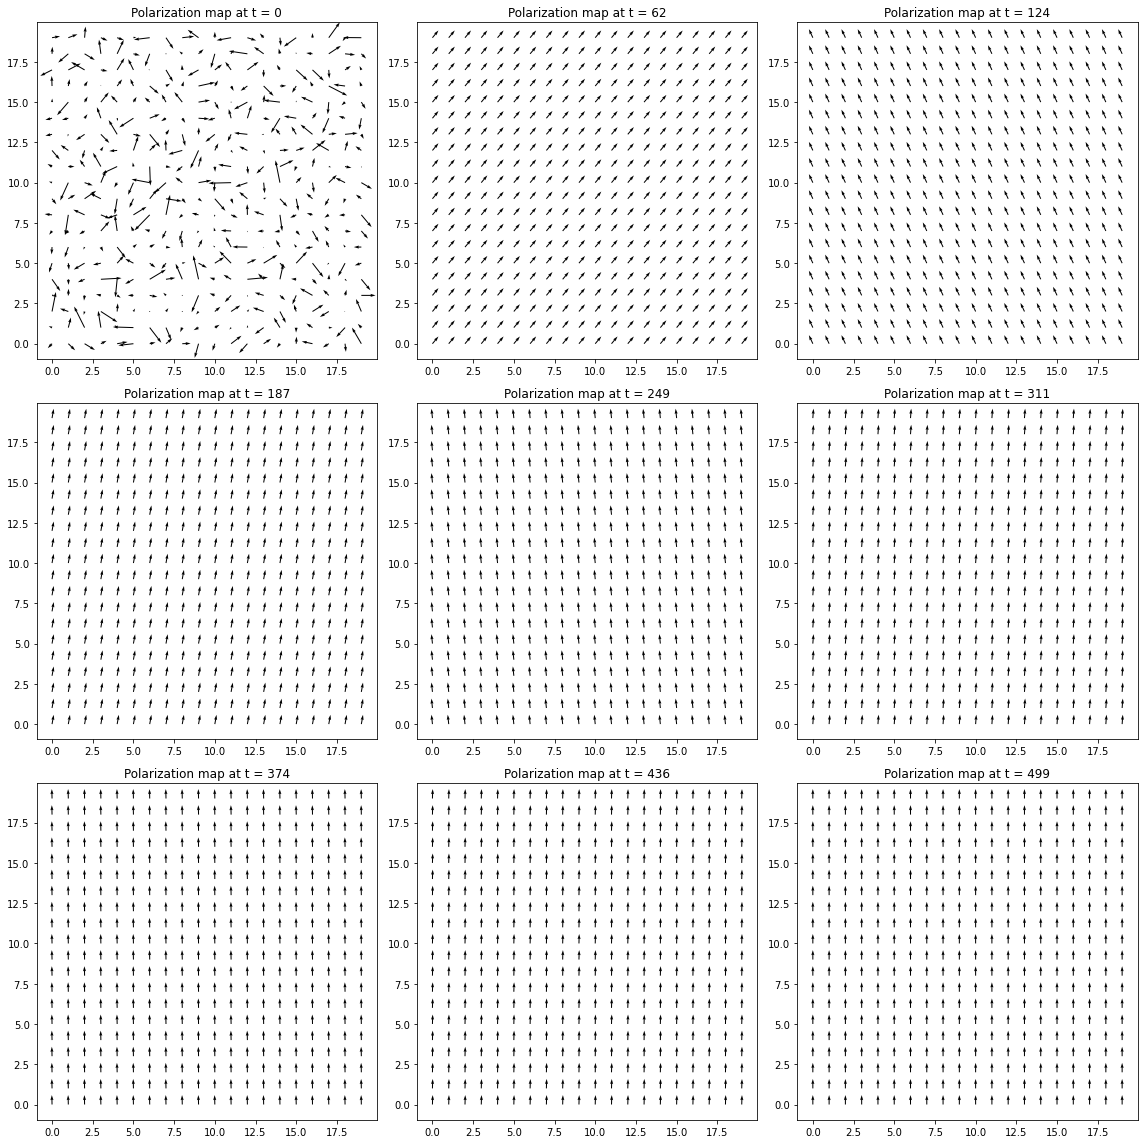

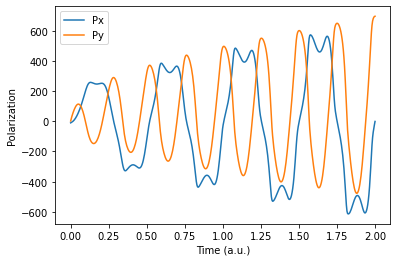

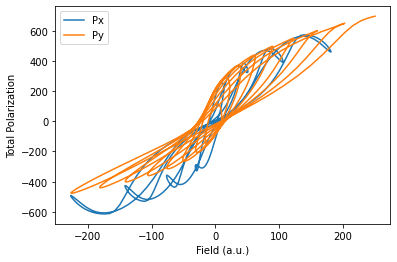

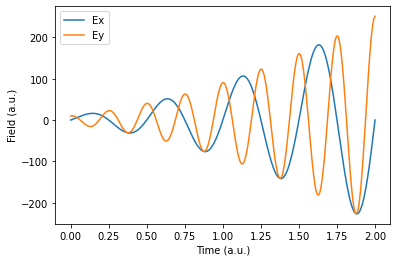

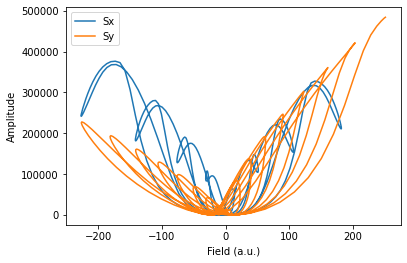

In [ ]:
#Ok, Now we can run the simulator with these settings,
#making sure to switch from uniaxial to tetragonal mode
sim = Ferro2DSim(n=20, time_vec = time_vec, appliedE= applied_field,
                 mode = 'tetragonal', init = 'random')
sim.runSim()
sim.plot_quiver()
sim.plot_summary()

/content/src/ferrosim/ferrosim/simclass.py:510: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig2.tight_layout()


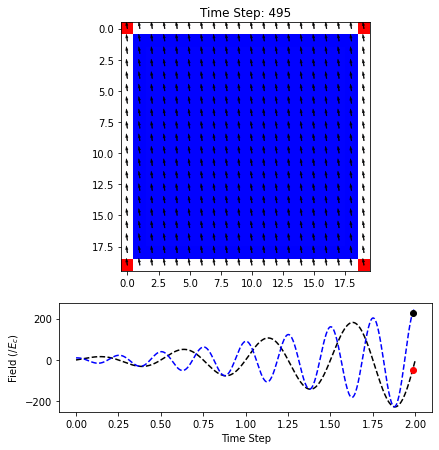

In [ ]:
sim.getPmat()
sim_animation = sim.make_interactive_plot() #this will not work in Colab. It will play an animation for you.
sim_animation.save('P_dynamics_tetragonal.mp4', fps = 5) #however we can save movies like this!

# Adding Custom Defects
We can also add defects to the simulation easily.

## Random Field Effects
Defects can interact with the lattice through field effects (no elastic considerations in this model whatsoever). The simulation expects defects to be entered in as a list of length (n x n) with each element being a tuple $(RF_x, RF_y)$. The units of the $RF_x$ and $RF_y$ are, as with the applied field, multiples of the nominal coercive field (set by the simulations alpha and beta values in the Landau expansion - that can also be changed if you so wish!).

## Random Bond Effects
We can also add defects that produce random-bond disorder: in this case, the coupling constant k is no longer uniform, but spatially dependent. So, k should now be provided as a list of size (n x n). The Default is a list of length (n x n) with all elements set to 1.0.

## Screening effects
Finally, we note that depolarization effects are considered in the model as a uniform constant multipled by the total polarization. However, we can alter this by assuming some screening (e.g., from migration of internal charges, or band bending etc.). The simulation then expects a list of length (n x n) with each element equal to the factor that multiples the total polarization. The Default is set to 0.0 at all sites.

In [ ]:
#Here, we will choose periodic defects with RF in y direction only
#There are many better ways to to this, but for now it does

n = 10 #lattice size
time_vec = np.linspace(0,4,500)

defect_list = []
for row in range(n):
    for col in range(n):
        Efx = 0.01
        Efy = 0.01
        #We place defects every fifth row and 2nd column
        if row%5==0 and col%10==0: Efy = np.random.normal(loc = 15.5, scale = 0.5)

        defect_list.append((Efx, Efy))

#Let's add some random bond disorder. Here we will assume the random bond disorder
#is just a small noise term on teh existing constant value
k = [np.random.normal(loc=1.0,scale = 0.1) for ind in range(n*n)]

#Finally, let's also play with the depolarization. In this case it is going to be random.
dep_alpha = [np.random.uniform(low=0.4, high= 0.8) for ind in range(n*n)]

#Let's just have a sinusoidal field
Evec_x = 10*np.ones(len(time_vec))
Evec_y = 190*np.sin(2*np.pi*time_vec)
applied_field = np.vstack((Evec_x, Evec_y)).T

In [ ]:
sim = Ferro2DSim(n=n, time_vec = time_vec, appliedE=applied_field,
                 defects=defect_list, k=k, dep_alpha = dep_alpha, mode = 'tetragonal')

---Performing simulation---


100%|██████████| 498/498 [00:07<00:00, 64.73it/s]


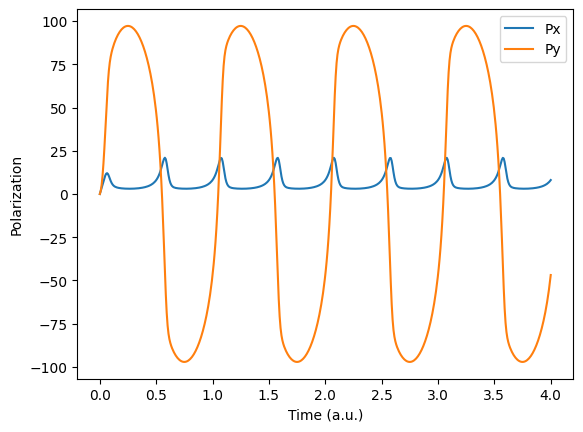

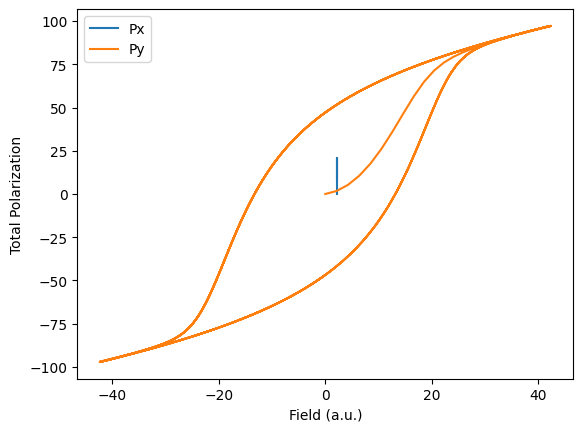

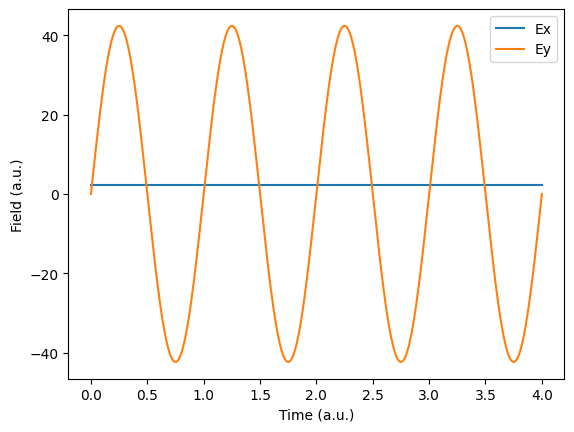

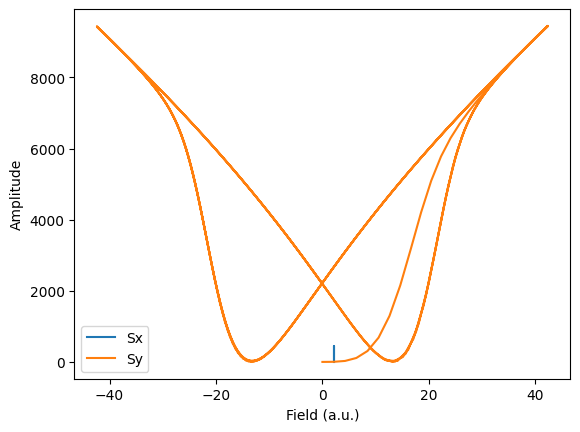

In [ ]:
sim.runSim()
sim.plot_summary()


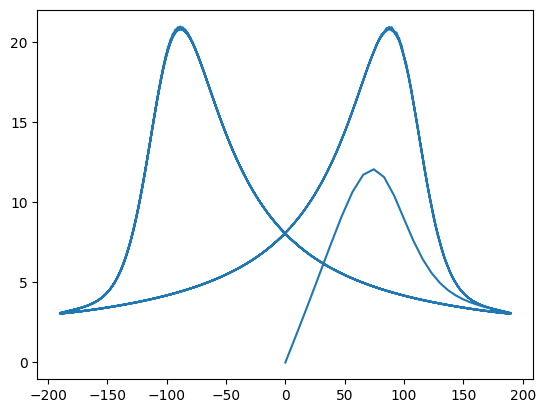

In [ ]:
sim.results['Polarization'].shape

plt.figure()
plt.plot(applied_field[:,1], sim.results['Polarization'][0,:])

/content/src/ferrosim/ferrosim/simclass.py:510: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig2.tight_layout()


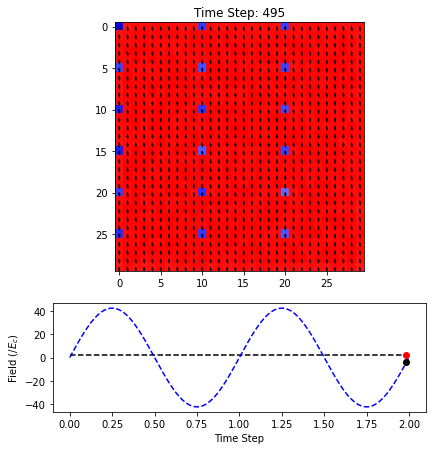

In [ ]:
sim_animation = sim.make_interactive_plot() #this will not work in Colab. It will play an animation for you.
sim_animation.save('P_dynamics_tetragonal_defects.mp4', fps = 5) #however we can save movies like this!

# Ground states: Tetragonal

We can try to explore ground states by letting the system equlibrate. It still helps to apply a field initially just to assist the process. In the following we will apply a small field for some time and then remove it, equlibrating in zero field. Increasing the coupling constant allows us to get to the ground state faster (this is convenient).

In [ ]:
#Now let's apply a small field in both x and y directions and lift.

n= 20
Ec_frac = 0.5
time_vec = np.linspace(0,3,800)
applied_field = np.zeros((len(time_vec),2))
applied_field[:len(time_vec)//4,:] = -Ec_frac
defect_list = [(0,0) for ind in range(n*n)]

#set up the sim. Here we add the flag 'random' to the init argument when instantiating the simulator
sim = Ferro2DSim(n=n, time_vec = time_vec, appliedE=applied_field,
                 defects=defect_list, k=10.0, dep_alpha = 0.2,
                 init = 'random', mode = 'tetragonal')



---Performing simulation---


100%|██████████| 798/798 [00:42<00:00, 18.80it/s]


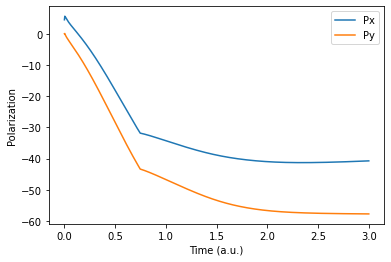

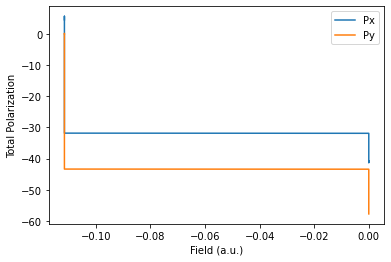

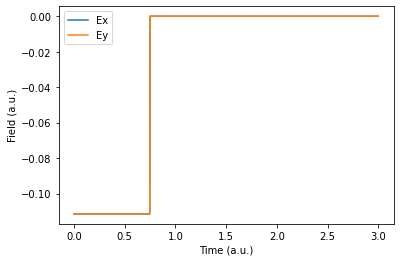

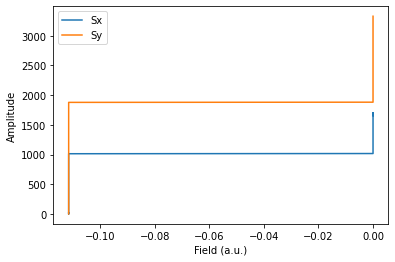

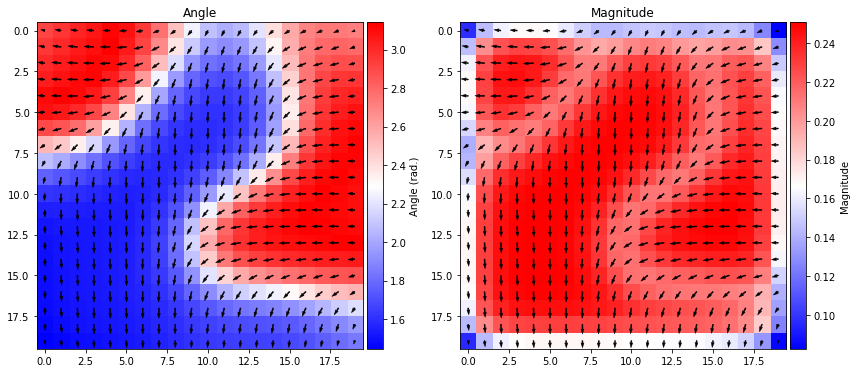

In [ ]:
sim.runSim();
Pmat = sim.getPmat()
sim.plot_summary()
fig, _, _ = sim.plot_mag_ang(time_step = len(time_vec)-1)

/content/src/ferrosim/ferrosim/simclass.py:510: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig2.tight_layout()


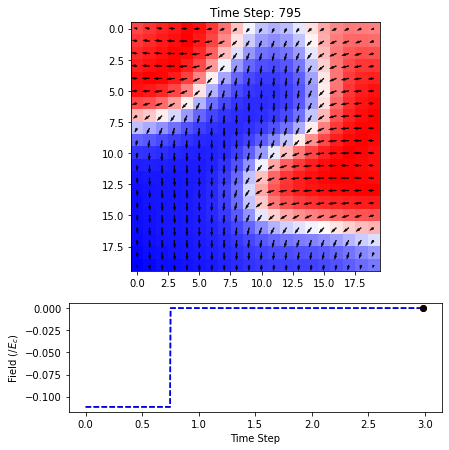

In [ ]:
sim_animation = sim.make_interactive_plot() #this will not work in Colab. It will play an animation for you.
sim_animation.save('P_dynamics_tetragonal_gs.mp4', fps = 5) #however we can save movies like this!

# Ground state: Rhombohedral

Let's do the same thing on the rhombohedral side



In [ ]:
#Now let's apply custom fields
n= 20
Ec_frac = 5.5
time_vec = np.linspace(0,10,800)
applied_field = np.zeros((len(time_vec),2))
applied_field[:len(time_vec)//4,:] = -Ec_frac
defect_list = [(0,0) for ind in range(n*n)]

#set up the sim. Here we add the flag 'random' to the init argument when instantiating the simulator
sim = Ferro2DSim(n=n, time_vec = time_vec, appliedE=applied_field,
                 defects=defect_list, k=4.0, dep_alpha = 0.1,
                 init = 'random', mode = 'rhombohedral')



---Performing simulation---


100%|██████████| 798/798 [00:43<00:00, 18.38it/s]


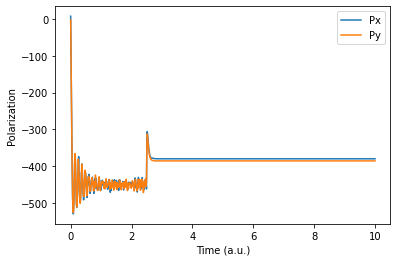

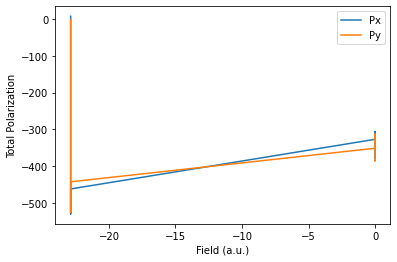

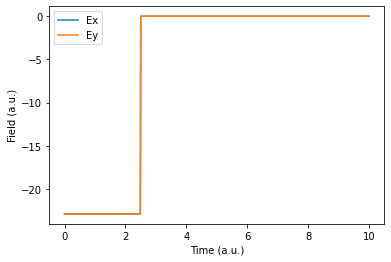

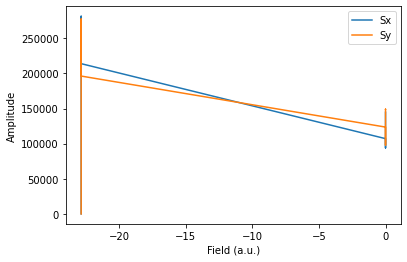

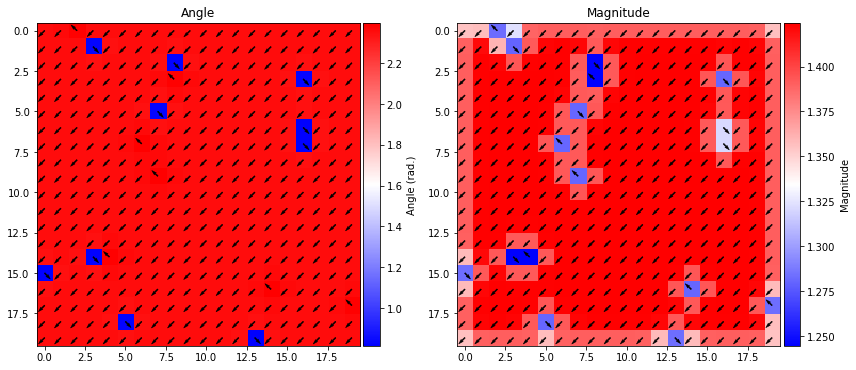

In [ ]:
sim.runSim();
Pmat = sim.getPmat()
sim.plot_summary()
fig, _, _ = sim.plot_mag_ang(time_step = len(time_vec)-1)

/content/src/ferrosim/ferrosim/simclass.py:510: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig2.tight_layout()


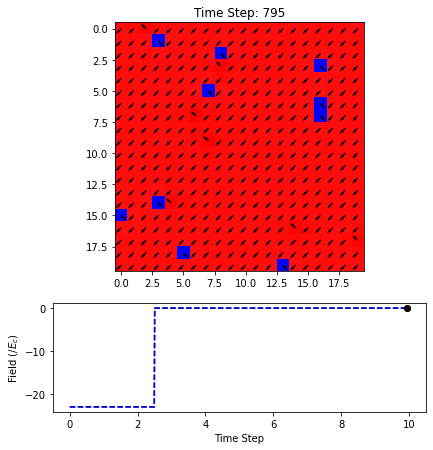

In [ ]:
sim_animation = sim.make_interactive_plot() #this will not work in Colab. It will play an animation for you.
sim_animation.save('P_dynamics_rhombohedral_gs.mp4', fps = 5) #however we can save movies like this!

# Ground state Squareelectric

Finally let's see what happens when we completely decouple the polarization components. We call this 'square electric'.

In [ ]:
#Now let's apply custom fields
n= 30
Ec_frac = 8.5
time_vec = np.linspace(0,3,100)
applied_field = np.zeros((len(time_vec),2))
applied_field[:len(time_vec)//4,:] = -Ec_frac
defect_list = [(0,0) for ind in range(n*n)]

#set up the sim. Here we add the flag 'random' to the init argument when instantiating the simulator
sim = Ferro2DSim(n=n, time_vec = time_vec, appliedE=applied_field,
                 defects=defect_list, k=4.0, dep_alpha = 10.1,
                 init = 'random', mode = 'squareelectric')



---Performing simulation---


100%|██████████| 98/98 [00:11<00:00,  8.53it/s]


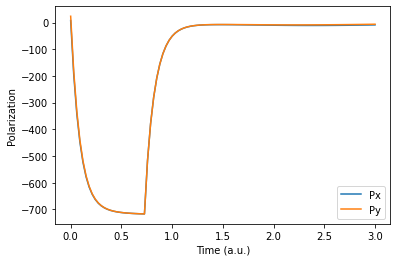

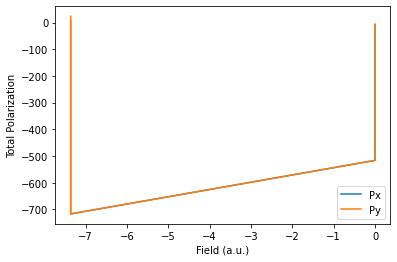

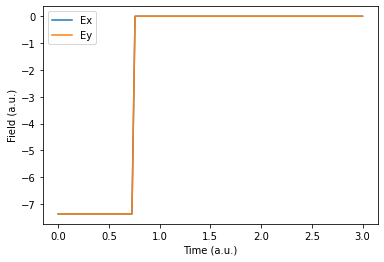

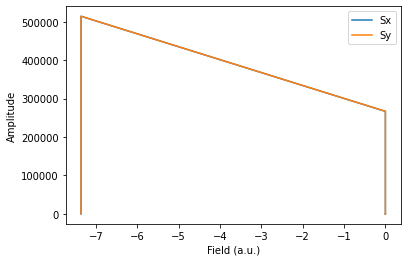

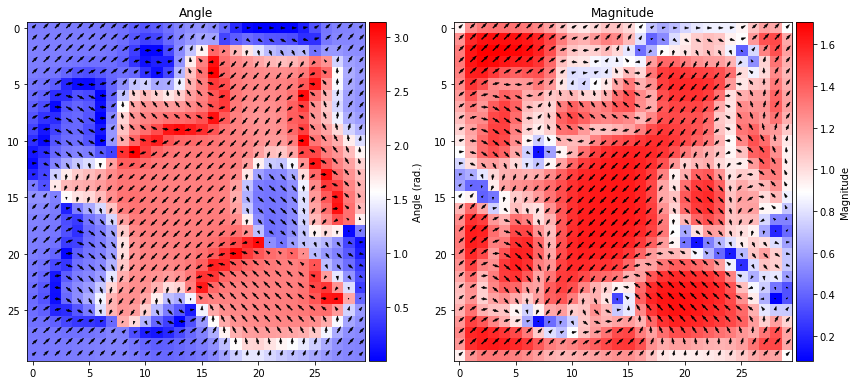

In [ ]:
sim.runSim();
Pmat = sim.getPmat()
sim.plot_summary()
fig, _, _ = sim.plot_mag_ang(time_step = len(time_vec)-1)

In [ ]:
fig.savefig('ferrosim.png', dpi = 600)

/content/src/ferrosim/ferrosim/simclass.py:510: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig2.tight_layout()


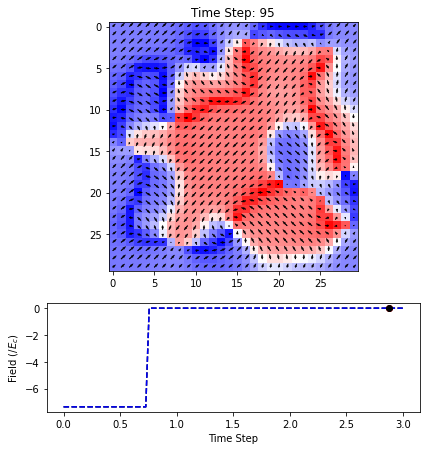

In [ ]:
sim_animation = sim.make_interactive_plot()
sim_animation.save('P_dynamics_squareelectric_gs.mp4', fps = 5)

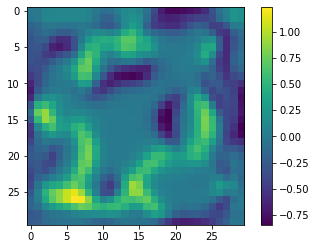

In [ ]:
curl = sim.calc_curl(Pmat[:,-1,:,:])
plt.figure()
plt.imshow(curl)
plt.colorbar()

In [ ]:
#Make RL environment here with agent to maximize curl


# 180 degree Domain Wall

Let's start with a 180 degree domain wall and go from there. We can initiate a starting configuration in the sim, as shown below.

In [ ]:
#Now let's apply custom fields
n= 20
Ec_frac = 0.5
time_vec = np.linspace(0,3,800)
applied_field = np.zeros((len(time_vec),2))
applied_field[:len(time_vec)//4,:] = -Ec_frac
defect_list = [(0,0) for ind in range(n*n)]

#set up the sim. Here we add the flag 'random' to the init argument when instantiating the simulator
sim = Ferro2DSim(n=n, time_vec = time_vec, appliedE=applied_field,
                 defects=defect_list, k=4.0, dep_alpha = 0.1,
                 init = 'random', mode = 'tetragonal')